In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import os
import datetime

In [7]:
data_dir = Path("/Users/marlen_raushanov/Desktop/Career Stuff/project_1/data/clean")
filename = "AmesHousing_clean.csv"
df_clean = pd.read_csv(data_dir/filename)

In [8]:
df_clean.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20.0,RL,133.18916,31770.000000,Pave,Unknown,IR1,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,5,2010,WD,Normal,215000.000000
1,2,526350040,20.0,RH,80.00000,11622.000000,Pave,Unknown,Reg,Lvl,...,0.0,Unknown,MnPrv,Unknown,0.000000,6,2010,WD,Normal,105000.000000
2,3,526351010,20.0,RL,81.00000,14267.000000,Pave,Unknown,IR1,Lvl,...,0.0,Unknown,Unknown,Gar2,1749.668018,6,2010,WD,Normal,172000.000000
3,4,526353030,20.0,RL,93.00000,11160.000000,Pave,Unknown,Reg,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,4,2010,WD,Normal,244000.000000
4,5,527105010,60.0,RL,74.00000,13830.000000,Pave,Unknown,IR1,Lvl,...,0.0,Unknown,MnPrv,Unknown,0.000000,3,2010,WD,Normal,189900.000000
5,6,527105030,60.0,RL,78.00000,9978.000000,Pave,Unknown,IR1,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,6,2010,WD,Normal,195500.000000
6,7,527127150,120.0,RL,41.00000,4920.000000,Pave,Unknown,Reg,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,4,2010,WD,Normal,213500.000000
7,8,527145080,120.0,RL,43.00000,5005.000000,Pave,Unknown,IR1,HLS,...,0.0,Unknown,Unknown,Unknown,0.000000,1,2010,WD,Normal,191500.000000
8,9,527146030,120.0,RL,39.00000,5389.000000,Pave,Unknown,IR1,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,3,2010,WD,Normal,236500.000000
9,10,527162130,60.0,RL,60.00000,7500.000000,Pave,Unknown,Reg,Lvl,...,0.0,Unknown,Unknown,Unknown,0.000000,6,2010,WD,Normal,189000.000000


In [9]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns
df_numeric = df_clean[numeric_cols]
df_categorical = df_clean[categorical_cols]

In [10]:
#We want to transform the exact years in terms of date into the amount of years to this year, adding depth to the numbers
current_year = datetime.date.today().year
years_since_built = current_year - df_numeric['Year Built']
years_since_remod = current_year - df_numeric['Year Remod/Add']
df_numeric['Years since Built'] = years_since_built
df_numeric['Years since Remod/Add'] = years_since_remod
df_numeric[['Years since Built', 'Years since Remod/Add']].head(20)

,Years since Built,Years since Remod/Add
0,66.0,66
1,65.0,65
2,68.0,68
3,58.0,58
4,29.0,28
5,28.0,28
6,25.0,25
7,34.0,34
8,31.0,30
9,27.0,27


In [11]:
df_numeric.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Years since Built,Years since Remod/Add
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.289552,68.914858,9861.126716,6.096057,5.565424,1971.362786,1984.266553,97.314756,...,21.241547,0.966414,13.754698,0.483773,28.772933,6.216041,2007.790444,179500.848523,54.637214,41.733447
std,845.96247,1.887308e+08,42.337905,19.646306,4646.748227,1.407130,1.094187,30.225308,20.860286,158.002048,...,54.907233,8.605561,45.506138,7.247895,179.930772,2.714492,1.316613,74513.976849,30.225308,20.860286
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.861802,2.228530,1880.620232,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,16.000000,16.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,25.000000,22.000000
50%,1465.50000,5.354536e+08,50.000000,69.224590,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,53.000000,33.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,72.000000,61.000000
max,2930.00000,1.007100e+09,185.301446,133.189160,33787.975121,10.000000,8.897750,2010.000000,2010.000000,637.120749,...,215.428782,78.016485,184.264158,109.034887,1749.668018,12.000000,2010.000000,420456.137138,145.379768,76.000000


In [12]:
df_numeric.nunique()

Order                    2930
PID                      2930
MS SubClass                16
Lot Frontage              110
Lot Area                 1932
Overall Qual               10
Overall Cond                8
Year Built                115
Year Remod/Add             61
Mas Vnr Area              388
BsmtFin SF 1              980
BsmtFin SF 2              191
Bsmt Unf SF              1123
Total Bsmt SF            1039
1st Flr SF               1055
2nd Flr SF                626
Low Qual Fin SF             8
Gr Liv Area              1269
Bsmt Full Bath              5
Bsmt Half Bath              3
Full Bath                   5
Half Bath                   3
Bedroom AbvGr               7
Kitchen AbvGr               3
TotRms AbvGrd              11
Fireplaces                  4
Garage Yr Blt             102
Garage Cars                 7
Garage Area               588
Wood Deck SF              343
Open Porch SF             210
Enclosed Porch            131
3Ssn Porch                  3
Screen Por

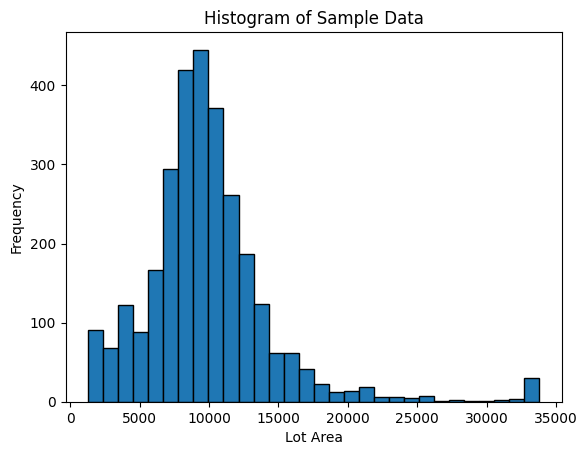

In [13]:
lot_area = df_numeric["Lot Area"]
plt.hist(lot_area, bins = 30, edgecolor = 'black')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# 4. Display the plot
plt.show()